**Q1: Function to calculate lift curve slope**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def vortex_lattice_lift_slope(SwpCQrtr, TprRatio, AspctRatio, M, N,ifwing): #Defining a function to calculate lift slope
    S = 1/AspctRatio  # Wing area
    b = np.sqrt(AspctRatio * S)  # Wing span
    cr=2*S/(b*(1+TprRatio))  # Root chord
    ct=2*S/b*(TprRatio/(1+TprRatio))  # Tip chord
    lbdaLE=np.arctan(2/b*((cr-ct)/4+b/2*np.tan(np.radians(SwpCQrtr))))  # Sweep angle at Leading edge

    # Initialize arrays

    C = []                           # Square matrix
    xm = np.zeros((M, N))            #X coordinate of control point
    ym = []                          #Y coordinate of control point
    x1n = np.zeros((M, N))           #Left end X coordinate of bound vortex filaments
    y1m = []                         #left end Y coordinate of bound vortex filaments
    x2n = np.zeros((M, N))           #Right end X coordinate of bound vortex filaments
    y2n = []                         #Right end Y coordinate of bound vortex filaments
    x1 = np.zeros((M, N))            #X-coordinate of upper and lower end of panels
    x2 = np.zeros((M, N))

    Y = np.linspace(-(b/2), (b/2),N+1)                    #This line generates an array Y that represents spanwise positions for lattice points
    Y_cp= np.linspace(-b/2+b/(2*N), b/2-b/(2*N), N)       #This line generates an array Y_cp that represents spanwise positions for control points.

    for i in range(M):                                    #This loop is used to initialize the spanwise position lists for lattice points and control points.
      y1m.append(Y[:-1])                                  #Generating 2D arrays for chordwise locations
      y2n.append(Y[1:])
      ym.append(Y_cp)

    for i in range(M):                     #This loop iterates for chordwise lattice points
      for j in range(N):                   #this lopp iterates for spanwise lattice points
        x1n[i][j]= (np.absolute(j-N/2)*b/N*np.tan(lbdaLE)) + (i+0.25)/M*(2*(ct-cr)*np.absolute(j-N/2)/N+cr)   #calculates the x-coordinate of the left end of a bound vortex filament
        x2n[i][j]=(np.absolute(j+1-N/2)*b/N*np.tan(lbdaLE)) + (i+0.25)/M*(2*(ct-cr)*np.absolute(j+1-N/2)/N+cr) #calculates the x-coordinate of the right end of a bound vortex filament
        xm[i][j]= (np.absolute(j+0.5-N/2)*b/N*np.tan(lbdaLE)) + (i+0.75)/M*(2*(ct-cr)*np.absolute(j+0.5-N/2)/N+cr) #calculates x-coordinate of a control point.

        x1[i][j]= (np.absolute(j-N/2)*b/N*np.tan(lbdaLE)) + (i)/M*(2*(ct-cr)*np.absolute(j-N/2)/N+cr)      # Extracts upper and lower ends of the panel for plotting wing surface
        x2[i][j]=(np.absolute(j+1-N/2)*b/N*np.tan(lbdaLE)) + (i)/M*(2*(ct-cr)*np.absolute(j+1-N/2)/N+cr)

    if ifwing==1:                                                                               #When ifwing is 1, the wing will be plotted
      plot_panel(SwpCQrtr, TprRatio, AspctRatio, M, N,x1,x2,x1n,x2n,xm,y1m,y2n,ym)               #Function call to plot wing

    # Calculate the C matrix
    row= []                       #This line initializes an empty list row, which is used to construct the rows of the C matrix.
    for i in range(M):             # loop to iterate over chordwise lattice points
        for j in range(N):         # loop iterates over the spanwise lattice points
            k=0                    # k is used to loop over chordwise lattice points within the C matrix
            while k<M:             # loop iterates over chordwise lattice points
                l=0                # l is used to loop over spanwise lattive points within the C matrix
                while l<N:         # loop iterates over spanwise lattice points
                    w_ab_byG = (1/((xm[i][j] - x1n[k][l]) * (ym[i][j]- y2n[k][l]) - (xm[i][j] - x2n[k][l]) * (ym[i][j]- y1m[k][l])) * \
                              ((((x2n[k][l] - x1n[k][l]) * (xm[i][j]- x1n[k][l]) + (y2n[k][l] - y1m[k][l]) * (ym[i][j] - y1m[k][l]))/ np.sqrt((xm[i][j] \
                              - x1n[k][l])**2 + (ym[i][j] - y1m[k][l])**2)) - (((x2n[k][l] - x1n[k][l]) * (xm[i][j] - x2n[k][l]) + (y2n[k][l] - y1m[k][l]) \
                                * (ym[i][j] - y2n[k][l]))/ np.sqrt((xm[i][j] - x2n[k][l])**2 + (ym[i][j] - y2n[k][l])**2)))) #downwash contribution coefficient of bound vortex
                    w_a_byG = ((1/(y1m[k][l]-ym[i][j]))*(1+ \
                                ((xm[i][j]-x1n[k][l])/np.sqrt((xm[i][j] - x1n[k][l])**2 + (ym[i][j] - y1m[k][l])**2))))
                    w_b_byG = (-1)*((1/(y2n[k][l]-ym[i][j]))* (1+ ((xm[i][j]-\
                                x2n[k][l])/np.sqrt((xm[i][j] - x2n[k][l])**2 + (ym[i][j] - y2n[k][l])**2))))
                    row.append(1/(4*np.pi)*(w_ab_byG+w_a_byG+w_b_byG))            # Contribution of the current vortex filament extending to infinity
                    l+=1
                k+=1
            C.append(row)
            row=[]                          #resetting row array for next loop

    inv = -np.linalg.inv(np.array(C))        #Calculating inverse of C matrix

    a = 2 * np.sum(inv)*b/(N * S)            #Calculating lift curve slop
    return a

#Function to check convergence
def converger(SwpCQrtr,TprRatio,AspctRatio):         #Defining convergence function
  i=1                 #represents the number of chordwise lattice points
  j=4                 #represnts the number of spanwise lattice points
  a=[]                #empty lists to store the lift-curve slope
  M=[]                #Empty list to store number of chordwise lattice points
  N=[]                #Empty list to store number of spanwise lattice points
  M.append(i)         # Appends list M as index progresses
  N.append(j)         # Appends list N as index progresses
  a.append(vortex_lattice_lift_slope(SwpCQrtr, TprRatio, AspctRatio, i,j,0))   #calulating lift curve slope and storing it in a
  tol=0.99            #setting tol variable to check convergence tolerance
  print("Iteration:",i,",Residual",tol)          #printing iteration and its residuals
  while tol>0.003:    #setting a loop
    i+=1              #represents the number of chordwise lattice points
    j+=4             #represents the number of spanwise lattice points
    a.append(vortex_lattice_lift_slope(SwpCQrtr, TprRatio, AspctRatio, i,j,0))    #lift curve slope is calculatted and appended in list a
    M.append(i)       #Appending list M and N to keep track of the lattice point
    N.append(j)
    tol=np.absolute(a[i-1]-a[i-2])      #comparing tolerace with previous value
    print("NLtcX:",i,",NLtcY:",j,",Residual:",tol)  #prints the runtime number of lattices and the corresponding residual

  plt.figure()
  plt.subplot(1, 2, 1)       #First subplot in a 1x2 grid
  plt.title("a vs NtcX")     #defining a Plot title
  plt.plot(M,a)             #plotting M on X-axis and a (lift curve slope) on y axis
  plt.ylabel('Lift-curve slope')  #labelling y axis as lift curve slope
  plt.xlabel('No. of Chordwise Lattice') #labelling x axis as chordwise lattive
  plt.grid()
  plt.subplot(1, 2, 2)
  plt.title("a vs NtcY")     #defining a Plot title
  plt.plot(N,a)              #plotting N on X-axis and a (lift curve slope) on y axis
  plt.ylabel('Lift-curve slope')  #labeling y axis as lift curve slope
  plt.xlabel('No. of Spanwise Lattice') #labelling x axis as chordwise lattive
  plt.grid()  #adds grid
  plt.show()  #displaying plots

  return i,j,a[-1]    #returning converged panels and lift slope

def plot_panel(SwpCQrtr, TprRatio, AspctRatio, M, N,x1,x2,x1n,x2n,xm,y1m,y2n,ym):
  for i in range(M):                                  #Looping through chordwise, plotting span connections
    plt.plot(y1m[i], x1[i], color="black")            #chordwise separations
    plt.plot(y2n[i], x2[i], color="black")
    plt.plot(y1m[i], x1n[i], color="blue")            # Bound vortex filaments
    plt.plot(y2n[i], x2n[i], color="blue")
  scatter = plt.scatter(ym[0:M-1], xm[0:M-1],color="red",s=5)   #Plotting the control points
  ax = scatter.axes
  ax.invert_yaxis()                                    # For proper scaling of graph
  plt.plot(y2n,x2n,y1m,x1n,color="black")             #Spanwise separations
  plt.show()

**Q2: Code Exercise with examples**

**Example 7.4:** Lift curve slope calculation of swept wing


___

In [ ]:
# Example Usage
SwpCQrtr = 45  #  sweep angle in degrees
TprRatio = 1  #  taper ratio
AspctRatio = 5  #  aspect ratio
NLtcX = 1 #  number of lattices along the chord
NLtcY = 8  #  number of lattices along the full-span

dCL_dalpha = vortex_lattice_lift_slope(SwpCQrtr, TprRatio, AspctRatio, NLtcX, NLtcY,0) #Calculating lift curve slope by calling VLM function
print("Lift Curve Slope (dCL/dα):", dCL_dalpha) #Printing lift curve slope

Lift Curve Slope (dCL/dα): 3.444224187713714


**Problem 7.9:** Swept wing, Aspect ratio effect comparison between values of 5 and 8

Iteration: 1 ,Residual 0.99
NLtcX: 2 ,NLtcY: 8 ,Residual: 0.13398235330424635
NLtcX: 3 ,NLtcY: 12 ,Residual: 0.07159710632053207
NLtcX: 4 ,NLtcY: 16 ,Residual: 0.04147060866059338
NLtcX: 5 ,NLtcY: 20 ,Residual: 0.02642708217226808
NLtcX: 6 ,NLtcY: 24 ,Residual: 0.01817284757334514
NLtcX: 7 ,NLtcY: 28 ,Residual: 0.013215595052225915
NLtcX: 8 ,NLtcY: 32 ,Residual: 0.010022530529069318
NLtcX: 9 ,NLtcY: 36 ,Residual: 0.007852124399217786
NLtcX: 10 ,NLtcY: 40 ,Residual: 0.006312754371640583
NLtcX: 11 ,NLtcY: 44 ,Residual: 0.005182787651581311
NLtcX: 12 ,NLtcY: 48 ,Residual: 0.004329572977241902
NLtcX: 13 ,NLtcY: 52 ,Residual: 0.003669940453175702
NLtcX: 14 ,NLtcY: 56 ,Residual: 0.003149669300571478
NLtcX: 15 ,NLtcY: 60 ,Residual: 0.0027322205856070703


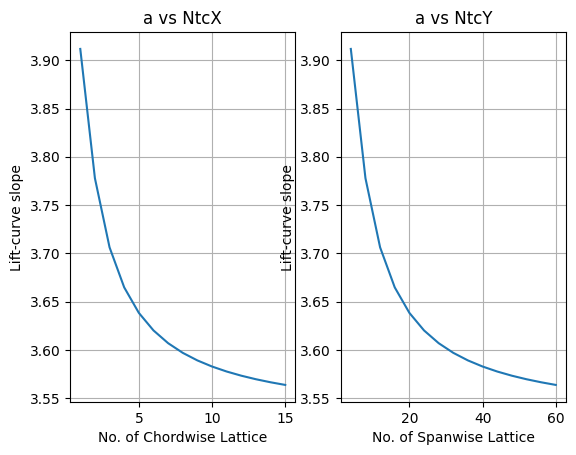

NLtcX= 15 NLtcY= 60 ,a (for AR=8)= 3.5636095582652882
Iteration: 1 ,Residual 0.99
NLtcX: 2 ,NLtcY: 8 ,Residual: 0.19224671154054462
NLtcX: 3 ,NLtcY: 12 ,Residual: 0.07968488028136944
NLtcX: 4 ,NLtcY: 16 ,Residual: 0.04218250728835704
NLtcX: 5 ,NLtcY: 20 ,Residual: 0.02591725645771792
NLtcX: 6 ,NLtcY: 24 ,Residual: 0.017483434625467087
NLtcX: 7 ,NLtcY: 28 ,Residual: 0.012570419128859367
NLtcX: 8 ,NLtcY: 32 ,Residual: 0.009464643638962045
NLtcX: 9 ,NLtcY: 36 ,Residual: 0.007379107757792269
NLtcX: 10 ,NLtcY: 40 ,Residual: 0.005912180318372151
NLtcX: 11 ,NLtcY: 44 ,Residual: 0.004841773756074197
NLtcX: 12 ,NLtcY: 48 ,Residual: 0.004037086174707216
NLtcX: 13 ,NLtcY: 52 ,Residual: 0.003417058174573828
NLtcX: 14 ,NLtcY: 56 ,Residual: 0.002929305707785712


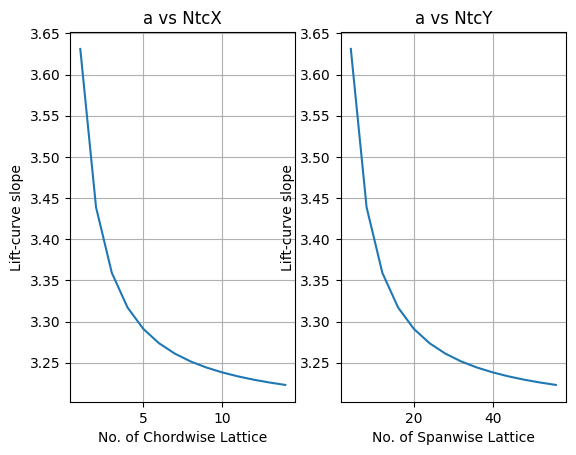

NLtcX= 14 NLtcY= 56 ,a (for AR=5)= 3.223077568063451


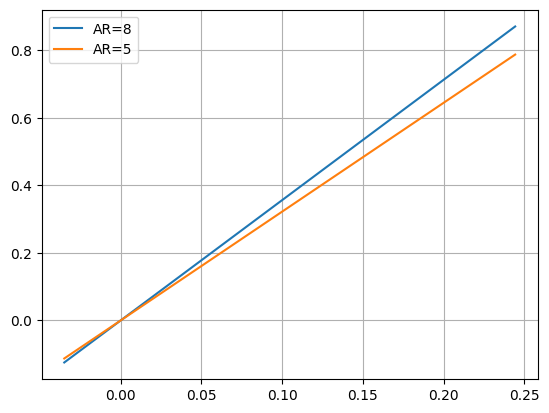

In [ ]:
SwpCQrtr = 45 #defining paramters from Q7.9
TprRatio = 1
AspctRatio = 8

###Convergence check
NLtcX,NLtcY,a=converger(SwpCQrtr,TprRatio,AspctRatio) #calling convergence function with specific values of variable defined above AR=8
alpha=np.radians(np.linspace(-2,14,2)) #for plotting AoA
cl8=a*alpha  #Calculating lift coeff of example 8
print("NLtcX=",NLtcX,"NLtcY=",NLtcY,",a (for AR=8)=",a)
AspctRatio = 5
NLtcX,NLtcY,a=converger(SwpCQrtr,TprRatio,AspctRatio)   #calling convergence function with specific values of variable defined above for AR=5 for comparison
cl5=a*alpha  #Calculating lift coeff of example 5
print("NLtcX=",NLtcX,"NLtcY=",NLtcY,",a (for AR=5)=",a)
plt.figure()  #plotting graph
plt.plot(alpha,cl8,label="AR=8")
plt.plot(alpha,cl5,label="AR=5")
plt.grid()
plt.legend()
plt.show()

From the plots, it can be seen that Aspect ratio increases the lift curve slope.The results are consistent with the knowledge of effect of Aspect Ratio.

**Problem 7.10:** Swept wing without unit taper

Iteration: 1 ,Residual 0.99
NLtcX: 2 ,NLtcY: 8 ,Residual: 0.12474102534157261
NLtcX: 3 ,NLtcY: 12 ,Residual: 0.056048035946687946
NLtcX: 4 ,NLtcY: 16 ,Residual: 0.030963794263557
NLtcX: 5 ,NLtcY: 20 ,Residual: 0.019454653608864003


<ipython-input-1-e71e195bce5e>:51: RuntimeWarning: divide by zero encountered in scalar divide
  w_ab_byG = (1/((xm[i][j] - x1n[k][l]) * (ym[i][j]- y2n[k][l]) - (xm[i][j] - x2n[k][l]) * (ym[i][j]- y1m[k][l])) * \
<ipython-input-1-e71e195bce5e>:51: RuntimeWarning: invalid value encountered in scalar multiply
  w_ab_byG = (1/((xm[i][j] - x1n[k][l]) * (ym[i][j]- y2n[k][l]) - (xm[i][j] - x2n[k][l]) * (ym[i][j]- y1m[k][l])) * \


NLtcX: 6 ,NLtcY: 24 ,Residual: nan


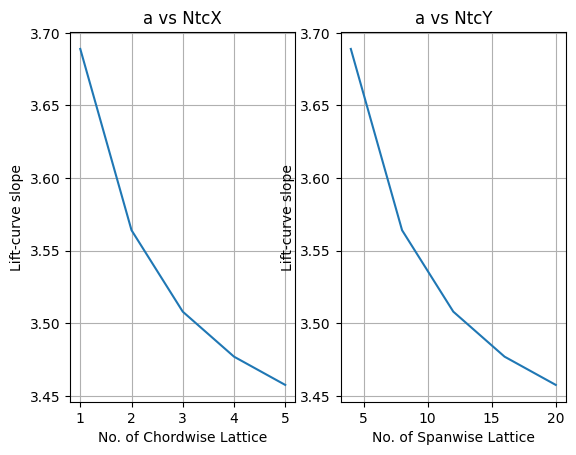

Lift Curve Slope (dCL/dα): nan


In [ ]:
SwpCQrtr = 45   #defining paramters from Q7.10
TprRatio = 0.5
AspctRatio = 5
NLtcX,NLtcY,a=converger(SwpCQrtr,TprRatio,AspctRatio)   #calling converger function with specific inputs
alpha=np.linspace(-2,14,2) #Varying AoA from -2 to 14 with 2 degree steps for plotting cl vs alpha
print("Lift Curve Slope (dCL/dα):", a)  #printing lift curve slope
cl=a*alpha #calculating lift coefficent

**Problem 7.11:** Forward Swept Wing

Iteration: 1 ,Residual 0.99
NLtcX: 2 ,NLtcY: 8 ,Residual: 0.16239924028464836
NLtcX: 3 ,NLtcY: 12 ,Residual: 0.055163058833933576
NLtcX: 4 ,NLtcY: 16 ,Residual: 0.027940199120910503
NLtcX: 5 ,NLtcY: 20 ,Residual: 0.016861621449184128
NLtcX: 6 ,NLtcY: 24 ,Residual: 0.01127018440268257
NLtcX: 7 ,NLtcY: 28 ,Residual: 0.008058371449426893
NLtcX: 8 ,NLtcY: 32 ,Residual: 0.006045041395720929
NLtcX: 9 ,NLtcY: 36 ,Residual: 0.004700588267080086
NLtcX: 10 ,NLtcY: 40 ,Residual: 0.003758643157641295
NLtcX: 11 ,NLtcY: 44 ,Residual: 0.003073327389690128
NLtcX: 12 ,NLtcY: 48 ,Residual: 0.002559306329036559


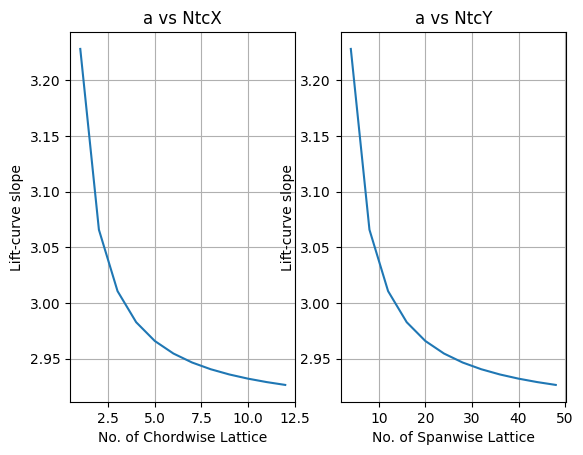

VLM Lift Curve Slope (dCL/dα): 2.9263203884208835


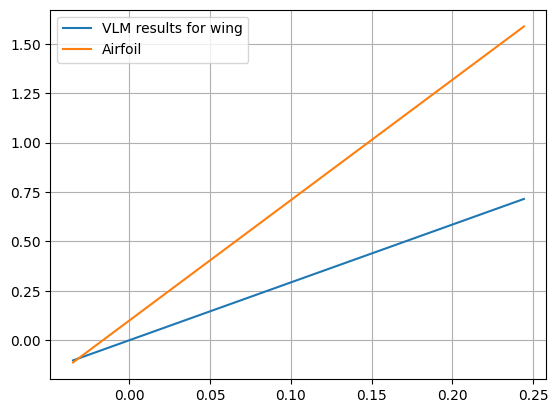

In [ ]:
SwpCQrtr = -45
TprRatio = 0.5
AspctRatio = 3.55
NLtcX,NLtcY,a=converger(SwpCQrtr,TprRatio,AspctRatio)   #calling converger function with specific inputs
alpha=np.radians(np.linspace(-2,14,2)) #Varying AoA from -2 to 14 with 2 degree steps for plotting CL vs alpha
print("VLM Lift Curve Slope (dCL/dα):", a)
cl=a*alpha    #calculating lift coefficient
alphaL0=np.ones(len(alpha))*(np.radians(-0.94)) #AoA at lift = 0
claf= 6.09*(alpha-alphaL0)    #lift coefficent with airfoil data given
plt.figure()   #plotting figure
plt.plot(alpha,cl,label="VLM results for wing")
plt.plot(alpha,claf,label="Airfoil")
plt.grid()
plt.legend()
plt.show()

The plot shows the variation of the VLM results to NACA 64A112 airfoil of infinite aspect ratio

**Problem 7.12:** Delta Wing

Sweep at Quarter chord: 63.43495
Iteration: 1 ,Residual 0.99
NLtcX: 2 ,NLtcY: 8 ,Residual: 0.05823310623480449
NLtcX: 3 ,NLtcY: 12 ,Residual: 0.019877121629288563
NLtcX: 4 ,NLtcY: 16 ,Residual: 0.008137215371301743
NLtcX: 5 ,NLtcY: 20 ,Residual: 0.004083168998455067
NLtcX: 6 ,NLtcY: 24 ,Residual: 0.0022957181415486083


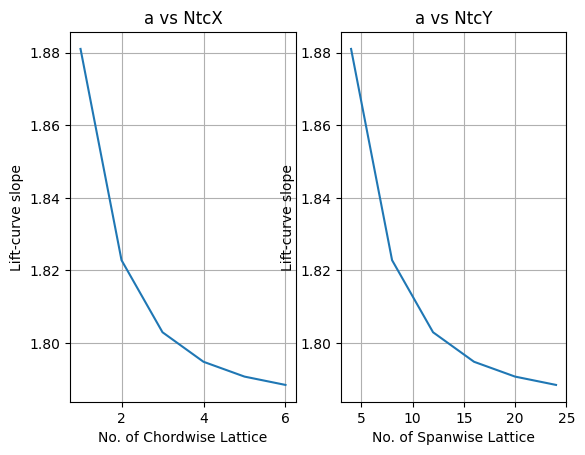

Lift Curve Slope (dCL/dα): 1.7884313550144424


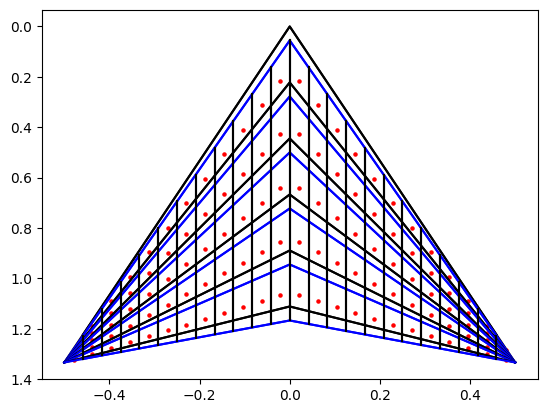

In [ ]:
TprRatio = 0
AspctRatio = 1.5
SwpCQrtr = round(np.degrees(np.arctan(3/AspctRatio)),5) # To find Sweep at Quarter chord from known data
print("Sweep at Quarter chord:",SwpCQrtr)
NLtcX,NLtcY,a=converger(SwpCQrtr,TprRatio,AspctRatio)   # Checking convergence for the given query
alpha=np.radians(np.linspace(-2,14,9))                  # AoA for plotting
print("Lift Curve Slope (dCL/dα):", a)                  # Lift curve slope solution
dCL_dalpha = vortex_lattice_lift_slope(SwpCQrtr, TprRatio, AspctRatio, NLtcX, NLtcY,1) #Called to plot wing


The value of lift coefficient at angle of attack of 10 degrees is 0.31214, whereas experimental shows around 0.315, which has only a 0.9% absolute error.

**Q3:** **Difference between Swept back and Swept forward wings**

Iteration: 1 ,Residual 0.99
NLtcX: 2 ,NLtcY: 8 ,Residual: 0.19224671154054462
NLtcX: 3 ,NLtcY: 12 ,Residual: 0.07968488028136944
NLtcX: 4 ,NLtcY: 16 ,Residual: 0.04218250728835704
NLtcX: 5 ,NLtcY: 20 ,Residual: 0.02591725645771792
NLtcX: 6 ,NLtcY: 24 ,Residual: 0.017483434625467087
NLtcX: 7 ,NLtcY: 28 ,Residual: 0.012570419128859367
NLtcX: 8 ,NLtcY: 32 ,Residual: 0.009464643638962045
NLtcX: 9 ,NLtcY: 36 ,Residual: 0.007379107757792269
NLtcX: 10 ,NLtcY: 40 ,Residual: 0.005912180318372151
NLtcX: 11 ,NLtcY: 44 ,Residual: 0.004841773756074197
NLtcX: 12 ,NLtcY: 48 ,Residual: 0.004037086174707216
NLtcX: 13 ,NLtcY: 52 ,Residual: 0.003417058174573828
NLtcX: 14 ,NLtcY: 56 ,Residual: 0.002929305707785712


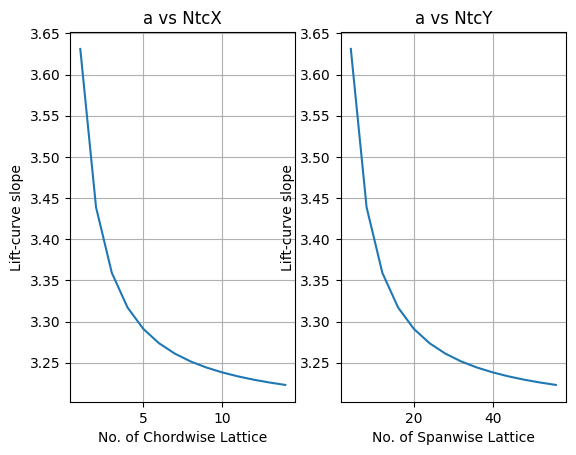

Lift Curve Slope for swept back wing(dCL/dα): 3.223077568063451
Iteration: 1 ,Residual 0.99
NLtcX: 2 ,NLtcY: 8 ,Residual: 0.13905959718225835
NLtcX: 3 ,NLtcY: 12 ,Residual: 0.05753976159159091
NLtcX: 4 ,NLtcY: 16 ,Residual: 0.03013304454249388
NLtcX: 5 ,NLtcY: 20 ,Residual: 0.01837410502345005
NLtcX: 6 ,NLtcY: 24 ,Residual: 0.01233270567127498
NLtcX: 7 ,NLtcY: 28 ,Residual: 0.008835948072773547
NLtcX: 8 ,NLtcY: 32 ,Residual: 0.006635694522076019
NLtcX: 9 ,NLtcY: 36 ,Residual: 0.0051633043808378964
NLtcX: 10 ,NLtcY: 40 ,Residual: 0.004130392797883076
NLtcX: 11 ,NLtcY: 44 ,Residual: 0.0033782636030497137
NLtcX: 12 ,NLtcY: 48 ,Residual: 0.002813805749943832


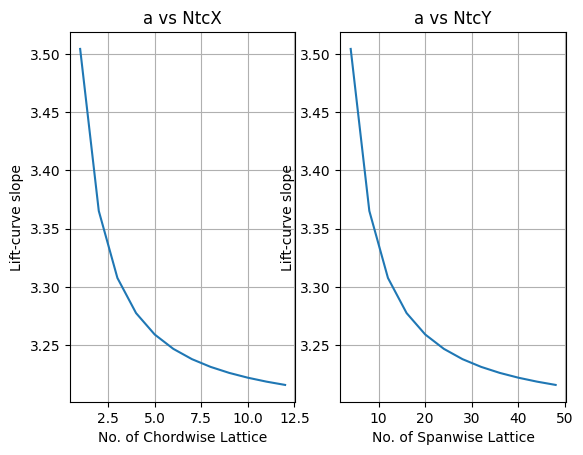

Lift Curve Slope for swept forward wing(dCL/dα): 3.2158072383287437


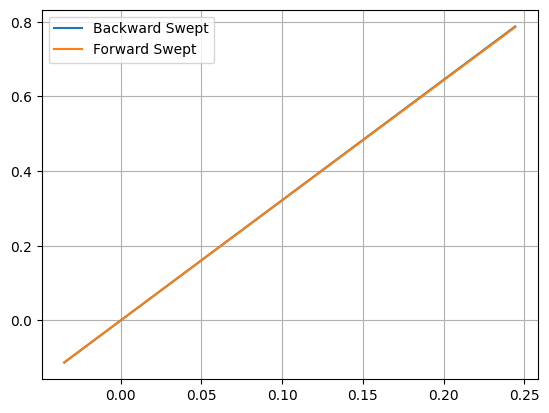

In [ ]:
SwpCQrtr = 45   # For sweep-back wing
TprRatio = 1
AspctRatio = 5
NLtcX,NLtcY,a=converger(SwpCQrtr,TprRatio,AspctRatio)    # To check the convergence for the Sweep back case
alpha=np.radians(np.linspace(-2,14,9))
print("Lift Curve Slope for swept back wing(dCL/dα):", a)
clb=a*alpha                                               # clb is lift coefficient for swept-back wing

SwpCQrtr = -45
NLtcX,NLtcY,a=converger(SwpCQrtr,TprRatio,AspctRatio)     # To check the convergence for the Sweep forward case
print("Lift Curve Slope for swept forward wing(dCL/dα):", a)

clf=a*alpha                                               # clb is lift coefficient for swept-forward wing
plt.figure()
plt.plot(alpha,clb,label="Backward Swept")
plt.plot(alpha,clf,label="Forward Swept")                  # comparison of cl with swept forward and backward case
plt.grid()
plt.legend()
plt.show()



```
# This is formatted as code
```



   blank space

blank space

blank space

Forward Swept wing has slightly lower lift curve slope to Backward Swept wing but in lower magnitude, where the difference between them is just 0.00727